In [84]:
import pandas as pd
import numpy as np
import os
os.chdir("/home/ml/optiguardml/models")
dataset = pd.read_csv('DataRaw.csv')
dataset = dataset.loc[(dataset.mm >= 45) & (dataset.mm <= 145)]
dataset.reset_index(inplace=True, drop=True)

dataset = dataset.dropna()
dataset

,mm,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,offsetx
0,45.0,137.0,12.0,18.0,37.0,13.0,21.0,45.0,23.0,-12.0
1,45.1,148.0,17.0,18.0,37.0,13.0,21.0,45.0,23.0,-12.0
2,45.2,154.0,23.0,19.0,37.0,13.0,21.0,45.0,23.0,-12.0
3,45.3,169.0,24.0,18.0,37.0,13.0,21.0,45.0,23.0,-12.0
4,45.4,183.0,16.0,18.0,37.0,13.0,21.0,45.0,23.0,-12.0
...,...,...,...,...,...,...,...,...,...,...
9004,144.6,50.0,18.0,18.0,37.0,13.0,21.0,46.0,7484.0,12.0
9005,144.7,50.0,26.0,18.0,37.0,13.0,21.0,46.0,7367.0,12.0
9006,144.8,50.0,20.0,18.0,37.0,13.0,21.0,46.0,7327.0,12.0
9007,144.9,50.0,13.0,18.0,37.0,12.0,21.0,46.0,7218.0,12.0


In [85]:
#dataset.quantile(q=[0, 0.001, 0.01, 0.1, 0.2, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [86]:
#dataset = dataset[dataset.offsetx==0]
#dataset.quantile(q=[0, 0.001, 0.01, 0.1, 0.2, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [87]:
# normalize by overall max value

allmax = dataset.filter(like='ch').max().max()
ds = dataset.filter(like='ch')/allmax

# normalize to -1 .. 1 and calculate arrcos
for i in range(1,9):
    v = ds.iloc[:,i]
    ds[f'ch{i}_norm'] = ((v - v.min()) / (v.max() - v.min()))
    ds[f'ch{i}_arcc'] = np.arccos(ds[f'ch{i}_norm'])
ds

,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,ch1_norm,ch1_arcc,...,ch4_norm,ch4_arcc,ch5_norm,ch5_arcc,ch6_norm,ch6_arcc,ch7_norm,ch7_arcc,ch8_norm,ch8_arcc
0,0.004522,0.000396,0.000594,0.001221,0.000429,0.000693,0.001485,0.000759,0.000127,1.570669,...,0.000042,1.570754,0.000043,1.570753,0.000039,1.570757,0.000114,1.570682,0.000127,1.570669
1,0.004885,0.000561,0.000594,0.001221,0.000429,0.000693,0.001485,0.000759,0.000340,1.570457,...,0.000042,1.570754,0.000043,1.570753,0.000039,1.570757,0.000114,1.570682,0.000340,1.570457
2,0.005083,0.000759,0.000627,0.001221,0.000429,0.000693,0.001485,0.000759,0.000595,1.570202,...,0.000042,1.570754,0.000043,1.570753,0.000039,1.570757,0.000114,1.570682,0.000595,1.570202
3,0.005578,0.000792,0.000594,0.001221,0.000429,0.000693,0.001485,0.000759,0.000637,1.570159,...,0.000042,1.570754,0.000043,1.570753,0.000039,1.570757,0.000114,1.570682,0.000637,1.570159
4,0.006040,0.000528,0.000594,0.001221,0.000429,0.000693,0.001485,0.000759,0.000297,1.570499,...,0.000042,1.570754,0.000043,1.570753,0.000039,1.570757,0.000114,1.570682,0.000297,1.570499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9004,0.001650,0.000594,0.000594,0.001221,0.000429,0.000693,0.001518,0.247013,0.000382,1.570414,...,0.000042,1.570754,0.000043,1.570753,0.000078,1.570719,0.284766,1.282034,0.000382,1.570414
9005,0.001650,0.000858,0.000594,0.001221,0.000429,0.000693,0.001518,0.243151,0.000722,1.570074,...,0.000042,1.570754,0.000043,1.570753,0.000078,1.570719,0.280302,1.286687,0.000722,1.570074
9006,0.001650,0.000660,0.000594,0.001221,0.000429,0.000693,0.001518,0.241831,0.000467,1.570329,...,0.000042,1.570754,0.000043,1.570753,0.000078,1.570719,0.278776,1.288277,0.000467,1.570329
9007,0.001650,0.000429,0.000594,0.001221,0.000396,0.000693,0.001518,0.238234,0.000170,1.570626,...,0.000000,1.570796,0.000043,1.570753,0.000078,1.570719,0.274618,1.292604,0.000170,1.570626


In [88]:
ds = ds.filter(like='arc')
ds

,ch1_arcc,ch2_arcc,ch3_arcc,ch4_arcc,ch5_arcc,ch6_arcc,ch7_arcc,ch8_arcc
0,1.570669,1.570562,1.570796,1.570754,1.570753,1.570757,1.570682,1.570669
1,1.570457,1.570562,1.570796,1.570754,1.570753,1.570757,1.570682,1.570457
2,1.570202,1.570528,1.570796,1.570754,1.570753,1.570757,1.570682,1.570202
3,1.570159,1.570562,1.570796,1.570754,1.570753,1.570757,1.570682,1.570159
4,1.570499,1.570562,1.570796,1.570754,1.570753,1.570757,1.570682,1.570499
...,...,...,...,...,...,...,...,...
9004,1.570414,1.570562,1.570796,1.570754,1.570753,1.570719,1.282034,1.570414
9005,1.570074,1.570562,1.570796,1.570754,1.570753,1.570719,1.286687,1.570074
9006,1.570329,1.570562,1.570796,1.570754,1.570753,1.570719,1.288277,1.570329
9007,1.570626,1.570562,1.570796,1.570796,1.570753,1.570719,1.292604,1.570626


In [89]:
# drop too low levels
#lowlevel = 8
#for i in range(1,9):
#    dataset.iloc[:,i] = [0 if j < lowlevel else j for j in dataset.iloc[:,i]]
#dataset

In [90]:
# generate ratios
for i in range(1,8):
    for j in range(i+1, 9):
        ds[f'arc_ch{i}_div_arcch{j}'] = ds.iloc[:,i-1] / ds.iloc[:, j-1]
ds

,ch1_arcc,ch2_arcc,ch3_arcc,ch4_arcc,ch5_arcc,ch6_arcc,ch7_arcc,ch8_arcc,arc_ch1_div_arcch2,arc_ch1_div_arcch3,...,arc_ch4_div_arcch5,arc_ch4_div_arcch6,arc_ch4_div_arcch7,arc_ch4_div_arcch8,arc_ch5_div_arcch6,arc_ch5_div_arcch7,arc_ch5_div_arcch8,arc_ch6_div_arcch7,arc_ch6_div_arcch8,arc_ch7_div_arcch8
0,1.570669,1.570562,1.570796,1.570754,1.570753,1.570757,1.570682,1.570669,1.000068,0.999919,...,1.000001,0.999998,1.000046,1.000054,0.999997,1.000045,1.000054,1.000048,1.000056,1.000008
1,1.570457,1.570562,1.570796,1.570754,1.570753,1.570757,1.570682,1.570457,0.999933,0.999784,...,1.000001,0.999998,1.000046,1.000190,0.999997,1.000045,1.000189,1.000048,1.000192,1.000143
2,1.570202,1.570528,1.570796,1.570754,1.570753,1.570757,1.570682,1.570202,0.999792,0.999621,...,1.000001,0.999998,1.000046,1.000352,0.999997,1.000045,1.000351,1.000048,1.000354,1.000306
3,1.570159,1.570562,1.570796,1.570754,1.570753,1.570757,1.570682,1.570159,0.999744,0.999594,...,1.000001,0.999998,1.000046,1.000379,0.999997,1.000045,1.000378,1.000048,1.000381,1.000333
4,1.570499,1.570562,1.570796,1.570754,1.570753,1.570757,1.570682,1.570499,0.999960,0.999811,...,1.000001,0.999998,1.000046,1.000163,0.999997,1.000045,1.000162,1.000048,1.000165,1.000116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9004,1.570414,1.570562,1.570796,1.570754,1.570753,1.570719,1.282034,1.570414,0.999906,0.999757,...,1.000001,1.000023,1.225205,1.000217,1.000022,1.225204,1.000216,1.225177,1.000194,0.816367
9005,1.570074,1.570562,1.570796,1.570754,1.570753,1.570719,1.286687,1.570074,0.999690,0.999540,...,1.000001,1.000023,1.220774,1.000433,1.000022,1.220773,1.000432,1.220746,1.000410,0.819507
9006,1.570329,1.570562,1.570796,1.570754,1.570753,1.570719,1.288277,1.570329,0.999852,0.999703,...,1.000001,1.000023,1.219268,1.000271,1.000022,1.219267,1.000270,1.219240,1.000248,0.820387
9007,1.570626,1.570562,1.570796,1.570796,1.570753,1.570719,1.292604,1.570626,1.000041,0.999892,...,1.000027,1.000049,1.215218,1.000108,1.000022,1.215185,1.000081,1.215158,1.000059,0.822987


In [91]:
ds = ds.filter(like='_div_')
ds['is_offsetx'] = np.where(dataset.offsetx != 0, 'IsOffset', 'NoOffset')
ds

,arc_ch1_div_arcch2,arc_ch1_div_arcch3,arc_ch1_div_arcch4,arc_ch1_div_arcch5,arc_ch1_div_arcch6,arc_ch1_div_arcch7,arc_ch1_div_arcch8,arc_ch2_div_arcch3,arc_ch2_div_arcch4,arc_ch2_div_arcch5,...,arc_ch4_div_arcch6,arc_ch4_div_arcch7,arc_ch4_div_arcch8,arc_ch5_div_arcch6,arc_ch5_div_arcch7,arc_ch5_div_arcch8,arc_ch6_div_arcch7,arc_ch6_div_arcch8,arc_ch7_div_arcch8,is_offsetx
0,1.000068,0.999919,0.999946,0.999946,0.999944,0.999992,1.0,0.999851,0.999877,0.999878,...,0.999998,1.000046,1.000054,0.999997,1.000045,1.000054,1.000048,1.000056,1.000008,IsOffset
1,0.999933,0.999784,0.999810,0.999811,0.999808,0.999857,1.0,0.999851,0.999877,0.999878,...,0.999998,1.000046,1.000190,0.999997,1.000045,1.000189,1.000048,1.000192,1.000143,IsOffset
2,0.999792,0.999621,0.999648,0.999649,0.999646,0.999694,1.0,0.999829,0.999856,0.999857,...,0.999998,1.000046,1.000352,0.999997,1.000045,1.000351,1.000048,1.000354,1.000306,IsOffset
3,0.999744,0.999594,0.999621,0.999622,0.999619,0.999667,1.0,0.999851,0.999877,0.999878,...,0.999998,1.000046,1.000379,0.999997,1.000045,1.000378,1.000048,1.000381,1.000333,IsOffset
4,0.999960,0.999811,0.999837,0.999838,0.999835,0.999884,1.0,0.999851,0.999877,0.999878,...,0.999998,1.000046,1.000163,0.999997,1.000045,1.000162,1.000048,1.000165,1.000116,IsOffset
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9004,0.999906,0.999757,0.999783,0.999784,0.999806,1.224939,1.0,0.999851,0.999877,0.999878,...,1.000023,1.225205,1.000217,1.000022,1.225204,1.000216,1.225177,1.000194,0.816367,IsOffset
9005,0.999690,0.999540,0.999567,0.999568,0.999590,1.220245,1.0,0.999851,0.999877,0.999878,...,1.000023,1.220774,1.000433,1.000022,1.220773,1.000432,1.220746,1.000410,0.819507,IsOffset
9006,0.999852,0.999703,0.999729,0.999730,0.999752,1.218938,1.0,0.999851,0.999877,0.999878,...,1.000023,1.219268,1.000271,1.000022,1.219267,1.000270,1.219240,1.000248,0.820387,IsOffset
9007,1.000041,0.999892,0.999892,0.999919,0.999941,1.215087,1.0,0.999851,0.999851,0.999878,...,1.000049,1.215218,1.000108,1.000022,1.215185,1.000081,1.215158,1.000059,0.822987,IsOffset


In [92]:
data = ds.sample(frac=0.8, random_state=786)
data_unseen = ds.drop(data.index).reset_index(drop=True)
data.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (7207, 29)
Unseen Data For Predictions: (1802, 29)


In [93]:
from pycaret.classification import *

In [94]:
#? setup

In [95]:
cl1 = setup(data = data, 
                   transformation=False, 
                   target = 'is_offsetx', 
                   pca = False,
                   polynomial_features=False,
                   polynomial_degree=3,
                   remove_outliers=False,
                   outliers_threshold=0.05,
                   trigonometry_features=False,
                   session_id=123, 
                   feature_selection=False,
                   feature_interaction=False,
                   feature_ratio=False,
                   ignore_features=None
                  )

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,"IsOffset: 0, NoOffset: 1"
3,Original Data,"(7207, 29)"
4,Missing Values,True
5,Numeric Features,27
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [96]:
compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Light Gradient Boosting Machine,0.957600,0.975200,0.690000,0.914400,0.785100,0.762100
1,CatBoost Classifier,0.957400,0.973300,0.663500,0.941200,0.776400,0.753700
2,Extra Trees Classifier,0.954800,0.937900,0.734000,0.845300,0.784600,0.759500
3,Random Forest Classifier,0.948700,0.935500,0.649700,0.861500,0.739700,0.711900
4,K Neighbors Classifier,0.945100,0.852300,0.538400,0.956000,0.685300,0.658100
5,Decision Tree Classifier,0.942700,0.842200,0.695300,0.773700,0.731400,0.699500
6,Gradient Boosting Classifier,0.940300,0.936700,0.475100,0.988500,0.639900,0.612000
7,Extreme Gradient Boosting,0.936400,0.937300,0.434600,1.000000,0.603800,0.575300
8,Ada Boost Classifier,0.931600,0.928900,0.411800,0.952300,0.573400,0.542800
9,Linear Discriminant Analysis,0.929400,0.820800,0.418800,0.902700,0.570100,0.537400


In [343]:
#create_model.__doc__
#help(tune_model)
# et=tune_model('et', n_iter=100)
et=create_model('et')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.2887,0.4562,0.6754,0.9994,0.0122,0.0043
1,0.4745,1.7458,1.3213,0.9982,0.0251,0.0083
2,0.2979,0.6243,0.7902,0.9992,0.0151,0.0048
3,0.4195,0.9134,0.9557,0.9990,0.0182,0.0070
4,0.3146,0.7519,0.8671,0.9990,0.0162,0.0050
5,0.3312,0.7059,0.8401,0.9992,0.0154,0.0052
6,0.3070,0.5869,0.7661,0.9993,0.0144,0.0049
7,0.3904,1.0033,1.0017,0.9988,0.0188,0.0065
8,0.3416,0.8333,0.9128,0.9990,0.0172,0.0056
9,0.3442,0.6180,0.7861,0.9992,0.0142,0.0055


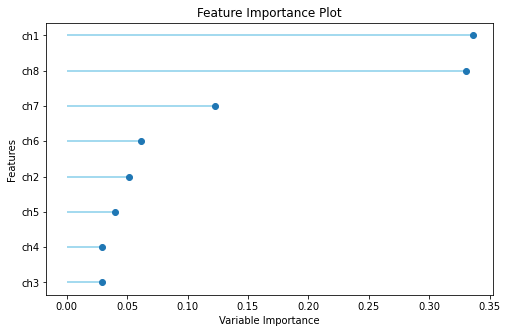

In [344]:
plot_model(et, 'feature')

In [345]:
#interpret_model(et)

In [346]:
#interpret_model(et, plot = 'correlation')

In [347]:
#interpret_model(et, plot = 'reason', observation = 10)

In [348]:
#pred=predict_model(et, data=data_unseen)
#pred

In [349]:
#? predict_model

In [350]:
#save_model(et, 'savedmodelet')
#et_saved = load_model('savedmodelet')

In [351]:
#save_experiment('experiment')

In [352]:
#experiment_loaded = load_experiment('experiment')

In [ ]:
import pandas as pd
import time
import os
os.chdir("/home/ml/optiguardml/models")
dataset = pd.read_csv('DataRaw.csv')
dataset = dataset.loc[(dataset.mm >= 45) & (dataset.mm <= 145)]
dataset.reset_index(inplace=True, drop=True)
dataset = dataset.dropna()

dataset['offsetx_abs'] = dataset.offsetx.abs()

# drop too low levels

from pycaret.regression import *

for lowlevel in range(0, 10000, 100):
    data = dataset.sample(frac=0.5, random_state=786)
    data_unseen = dataset.drop(data.index).reset_index(drop=True)
    data.reset_index(drop=True, inplace=True)

    for i in range(1,9):
            data.iloc[:,i] = [0 if j < lowlevel else j for j in data.iloc[:,i]]

    es = setup(data = data, target = 'mm', ignore_features=['offsetx', 'offsetx_abs'], silent=True)
    print(f'lowlevel: {lowlevel}')
    et = create_model('et')
    time.sleep(10)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,7147
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(4504, 11)"
4,Missing Values,False
5,Numeric Features,10
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


lowlevel: 6800


IntProgress(value=0, description='Processing: ', max=14)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:58:36
Status,. . . . . . . . . . . . . . . . . .,Fitting Fold 8 of 10
ETC,. . . . . . . . . . . . . . . . . .,1.2 Seconds Remaining


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.6924,65.4930,8.0928,0.9198,0.0985,0.0354
1,2.5085,57.1620,7.5606,0.9283,0.0937,0.0327
2,3.5665,97.9818,9.8986,0.8910,0.1294,0.0520
3,2.8325,62.7254,7.9199,0.9272,0.1050,0.0404
4,2.6560,40.5574,6.3685,0.9504,0.0959,0.0428
5,2.9087,63.6721,7.9795,0.9267,0.1046,0.0420
6,2.5532,57.4971,7.5827,0.9282,0.0954,0.0349
